# Demo: Usage of Keras models

How to load and predict with a trained keras model

In [23]:
import sys, os
ROOT_PATH = os.path.abspath(".").split("src")[0]
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/src/utils/"))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc 
from tabulate import tabulate

from sklearn.linear_model import LinearRegression

import keras
import tensorflow as tf
import functions as f
import dl_functions as dlf

In [24]:
# set plot settings
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})

rc('figure', figsize=(12,6), dpi=200)
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)
rc('font', family='serif')
rc('text', color="#000000")
rc('xtick', color="#000000")
rc('ytick', color="#000000")

SEED=100
np.random.seed(SEED)

In [25]:
# read data and metadata
df_train, df_valid, df_test = f.load_data()
stats, ts, ts_train, ts_valid, ts_test = f.load_metadata()

# split datasets into features and targets
x_train, y_train = f.split_dataset(df_train.values, delay=1)
x_valid, y_valid = f.split_dataset(df_valid.values, delay=1)
x_test, y_test = f.split_dataset(df_test.values, delay=1)

# metadata
target_tags = df_train.columns.values[:3]
feature_tags = df_train.columns.values[3:]
target_stds = stats.loc[target_tags,"Std"].values

### Load the models and predict

In [26]:
lstm = keras.models.load_model(ROOT_PATH + "models/ensemble/lstm_model.h5")
mlp = keras.models.load_model(ROOT_PATH + "models/ensemble/mlp_model.h5")
lm = f.load_pickle(ROOT_PATH + "models/ensemble/linear_model.pkl")

In [27]:
n_pred = 10
mean_preds, unc_preds = dlf.predict_with_ensemble(lm, lstm, mlp, 
                                                  x_test, y_test, 
                                                  n_pred=n_pred)

print(mean_preds.shape, unc_preds.shape)

(17736, 3) (17736, 3)


### Plots of the predictions

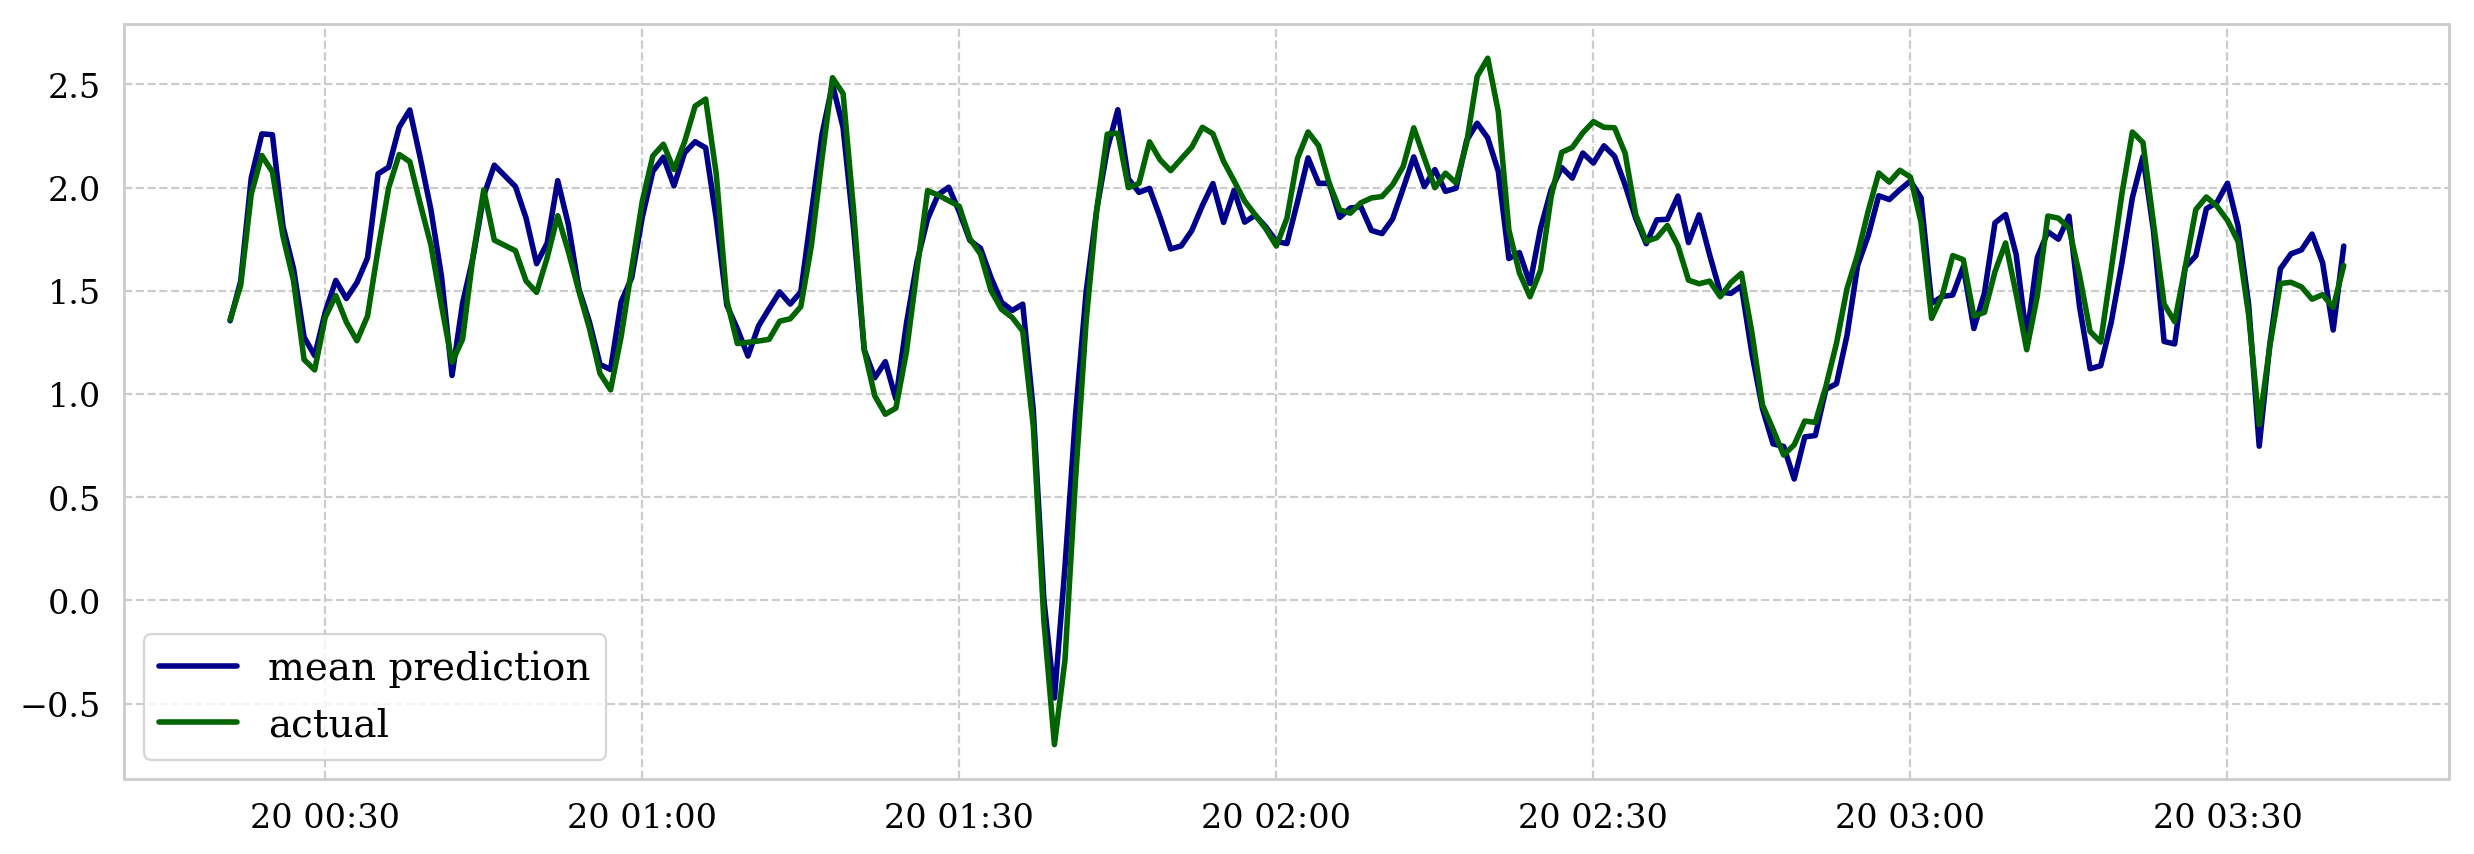

In [28]:
interval = range(12000,12200)
time = ts_test[interval]
signal=1

plt.figure(figsize=(15,5))
plt.plot(time, mean_preds[interval,signal], c="darkblue", lw=2, label="mean prediction")
plt.plot(time, y_test[interval,signal], c="darkgreen", lw=2, label="actual")
plt.legend(frameon=True)
plt.show()